(1）The probabilty of two dice rolling snake eyes is 1/36, since only one case is two ones out of total cases of 36. 
   And probability for sum of 7 is 1/6, with cases of (1, 6), (2， 5）, (3， 4）, (4， 3）, (5， 2）, (6， 1）out of 36 cases.
   The ratio of probability of snake eyes to sum of 7 is 1/6.
   
(2) Probability of each sum of 2 dice:
   Sum     Probability
   2       1/36
   3       2/36
   4       3/36
   5       4/36
   6       5/36
   7       6/36
   8       5/36
   9       4/36
   10      3/36
   11      2/36
   12      1/36
   

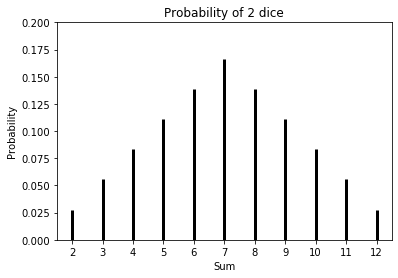

In [8]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal

dice = np.array([1 / 6] * 6)
sum_convol = signal.fftconvolve(dice, dice)
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("Probability of 2 dice")
plt.xticks(range(0, 13))
plt.ylim(0, 0.2)
plt.vlines(range(2, 13), 0, sum_convol, linewidth = 3);


(3) In order to calculate the mean, we need to calculate each sum multiplying with its probability, and then add them up to the mean.
    And variance is the sum of square of difference between each value with the mean.

In [11]:
mean = np.sum(np.arange(2, 13) * sum_convol)
variance = np.sum((np.arange(2, 13) - mean)**2 * sum_convol)
print("Mean and Variance:")
print(mean, variance)

Mean and Variance:
6.999999999999999 5.833333333333335


(4) Because the 10 dice are randomly rolled, the probability of the sum of dice should be in Gaussian distribution. And by looking at the graph, the mean is at the center, and the curve is symmetrical and in bell shape, so we can call it Gaussian.

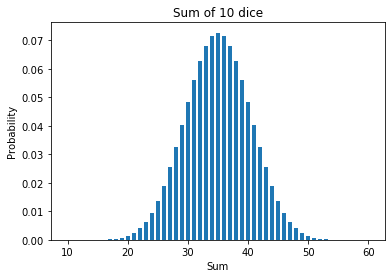

In [24]:
dice = np.array([1 / 6] * 6)
sum = signal.fftconvolve(dice, dice)
for i in range(8):
    sum = signal.fftconvolve(sum, dice)
fig = plt.bar(np.arange(10, 6*10 + 1), sum, width = 0.6)
plt.title("Sum of 10 dice")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.show()

(5) The graph shows that distributions of the sum and the average are both Gaussian. The standard deviation of average is just 1/4 of the standard deviation of sum.

0.5607768551502667 0.14019421378756666


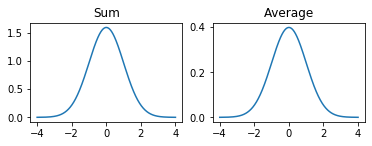

In [45]:
import statistics
from statistics import stdev
dist = stats.norm()
x = np.linspace(-4, 4, 1000)
ax_1 = plt.subplot(2, 2, 1)
ax_1.title.set_text('Sum')
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
std1 = stdev(dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x))

ax_2 = plt.subplot(2,2,2)
ax_2.title.set_text('Average')
ax_2.plot(x, (dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x)) / 4)
std2 = stdev(dist.pdf(x) + dist.pdf(x) + dist.pdf(x) + dist.pdf(x)) / 4
print(std1, std2)